<a href="https://colab.research.google.com/github/BibikaShrestha/AI_Assignment_BibikaShrestha_2462335/blob/main/2462335_BibikaShrestha_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Task - Bank Customer Churn Prediction
**Student:** Bibika Shrestha (2462335)

This notebook predicts whether a bank customer will leave (churn) or stay.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Import Libraries

In [4]:
# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn for ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded!")

Libraries loaded!


## 2. Load Data

**Dataset:** Customer Customer Churn Prediction
**UNSDG:** Goal 8 - Decent Work and Economic Growth

I chose this dataset because understanding customer churn helps banks improve services and maintain economic stability. Predicting churn allows banks to retain customers and support sustainable business growth.

**Questions this dataset can answer:**
1. Can we predict which customers will leave the bank?
2. What factors contribute most to customer churn?
3. How accurate can churn predictions be?

In [5]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/AI final assessment /Churn_Modelling.csv')

print("Dataset Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (10000, 14)

Columns:
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

First 5 rows:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. Data Quality Assessment

**Dataset Attributes:**
- **CreditScore:** Customer's credit score
- **Geography:** Country (France, Spain, Germany)
- **Gender:** Male/Female
- **Age:** Customer age
- **Tenure:** Years with the bank
- **Balance:** Account balance
- **NumOfProducts:** Number of bank products used
- **HasCrCard:** Has credit card (1=Yes, 0=No)
- **IsActiveMember:** Active membership status
- **EstimatedSalary:** Estimated annual salary
- **Exited:** TARGET - Did customer leave? (1=Yes, 0=No)

In [6]:
print("="*60)
print("DATA QUALITY ASSESSMENT")
print("="*60)

print("\nDataset Info:")
print(f"Total Records: {len(df)}")
print(f"Total Features: {df.shape[1] - 1}")

print("\nMissing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print(" No missing values found!")
else:
    print(missing[missing > 0])

print("\nTarget Variable Distribution:")
print(df['Exited'].value_counts())
print(f"\nChurn Rate: {df['Exited'].mean()*100:.2f}%")
print("Note: Dataset is imbalanced (20% churn, 80% stayed)")

print("\nData Types:")
print(df.dtypes)

DATA QUALITY ASSESSMENT

Dataset Info:
Total Records: 10000
Total Features: 13

Missing Values:
 No missing values found!

Target Variable Distribution:
Exited
0    7963
1    2037
Name: count, dtype: int64

Churn Rate: 20.37%
Note: Dataset is imbalanced (20% churn, 80% stayed)

Data Types:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


## 4. Data Cleaning and Preprocessing

In [7]:
# make a copy
data = df.copy()

# drop unnecessary columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

print("Dropped: RowNumber, CustomerId, Surname (not useful for prediction)")
print(f"\nShape after dropping: {data.shape}")

# encode categorical variables
print("\nEncoding categorical variables...")

# Geography
geography_dummies = pd.get_dummies(data['Geography'], prefix='Geography', drop_first=True)
data = pd.concat([data, geography_dummies], axis=1)
data = data.drop('Geography', axis=1)

# Gender: Label encoding (0=Female, 1=Male)
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

print(" Geography encoded (one-hot)")
print(" Gender encoded (0=Female, 1=Male)")
print(f"\nFinal shape: {data.shape}")
print(f"Total features: {data.shape[1] - 1}")

Dropped: RowNumber, CustomerId, Surname (not useful for prediction)

Shape after dropping: (10000, 11)

Encoding categorical variables...
 Geography encoded (one-hot)
 Gender encoded (0=Female, 1=Male)

Final shape: (10000, 12)
Total features: 11


## 5. Exploratory Data Analysis (EDA)

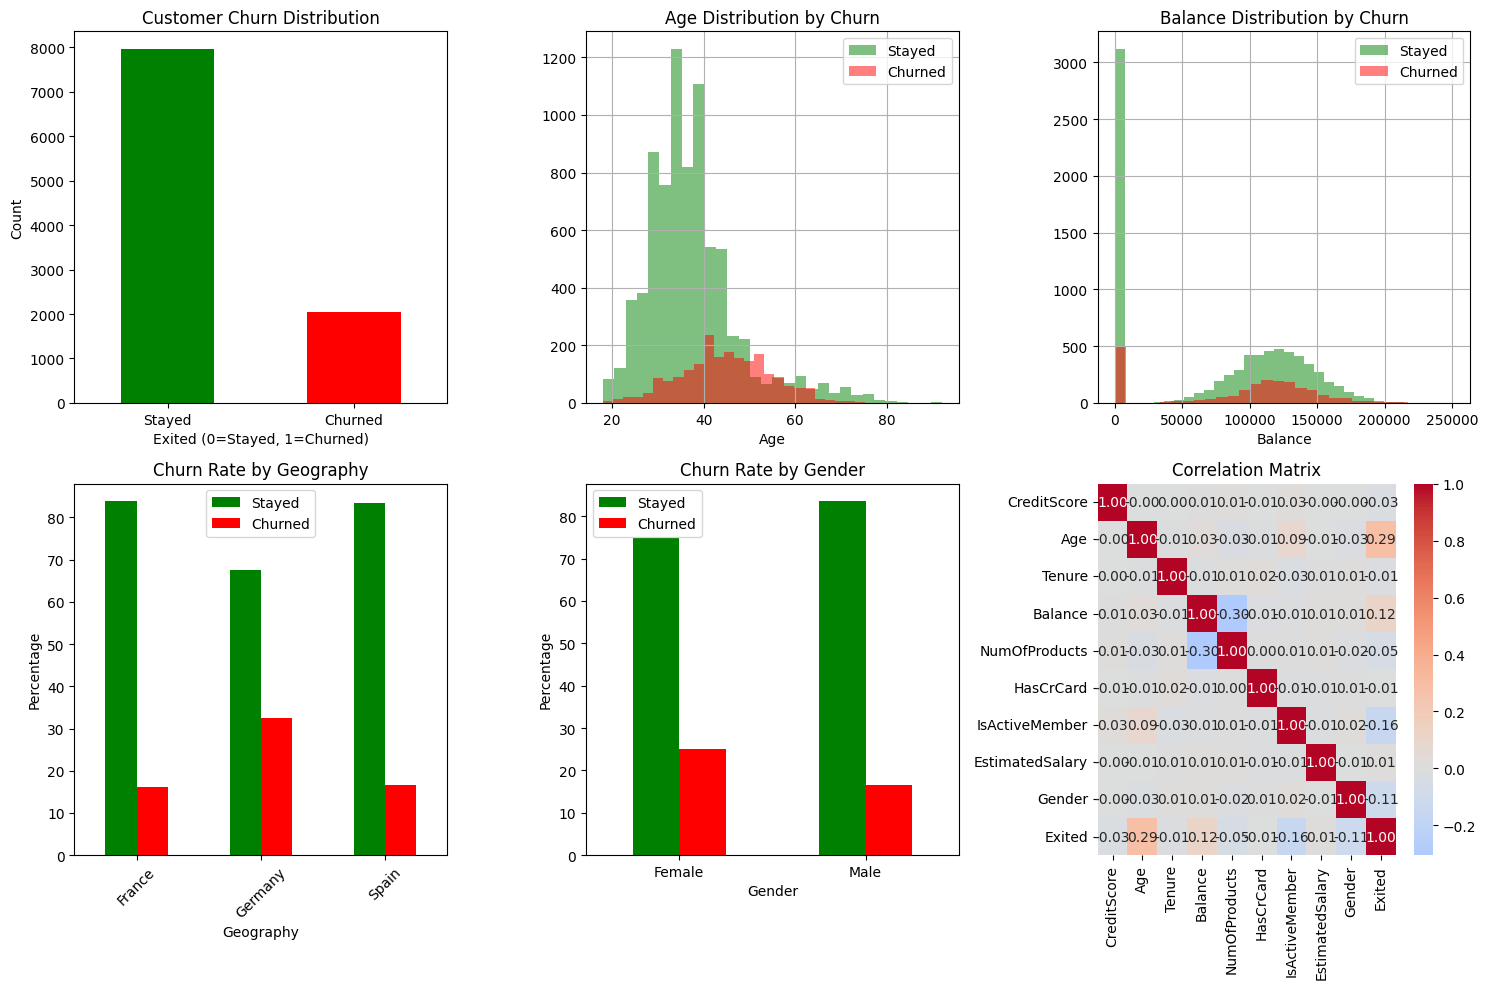


Key Insights from EDA:
1. Dataset is imbalanced - more customers stayed than churned
2. Older customers seem to churn more
3. Germany has higher churn rate than France/Spain
4. Female customers appear to churn more than males
5. Age shows positive correlation with churn


In [8]:
# create visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# plot 1 - target distribution
data['Exited'].value_counts().plot(kind='bar', ax=axes[0,0], color=['green', 'red'])
axes[0,0].set_title('Customer Churn Distribution')
axes[0,0].set_xlabel('Exited (0=Stayed, 1=Churned)')
axes[0,0].set_ylabel('Count')
axes[0,0].set_xticklabels(['Stayed', 'Churned'], rotation=0)

# plot 2 - age distribution by churn
data[data['Exited']==0]['Age'].hist(bins=30, alpha=0.5, label='Stayed', ax=axes[0,1], color='green')
data[data['Exited']==1]['Age'].hist(bins=30, alpha=0.5, label='Churned', ax=axes[0,1], color='red')
axes[0,1].set_title('Age Distribution by Churn')
axes[0,1].set_xlabel('Age')
axes[0,1].legend()

# plot 3 - balance distribution
data[data['Exited']==0]['Balance'].hist(bins=30, alpha=0.5, label='Stayed', ax=axes[0,2], color='green')
data[data['Exited']==1]['Balance'].hist(bins=30, alpha=0.5, label='Churned', ax=axes[0,2], color='red')
axes[0,2].set_title('Balance Distribution by Churn')
axes[0,2].set_xlabel('Balance')
axes[0,2].legend()

# plot 4 - churn by geography
churn_by_geo = pd.crosstab(df['Geography'], df['Exited'], normalize='index') * 100
churn_by_geo.plot(kind='bar', ax=axes[1,0], color=['green', 'red'])
axes[1,0].set_title('Churn Rate by Geography')
axes[1,0].set_ylabel('Percentage')
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45)
axes[1,0].legend(['Stayed', 'Churned'])

# plot 5 - churn by gender
churn_by_gender = pd.crosstab(df['Gender'], df['Exited'], normalize='index') * 100
churn_by_gender.plot(kind='bar', ax=axes[1,1], color=['green', 'red'])
axes[1,1].set_title('Churn Rate by Gender')
axes[1,1].set_ylabel('Percentage')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=0)
axes[1,1].legend(['Stayed', 'Churned'])

# plot 6 - correlation heatmap (numeric features only)
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Gender', 'Exited']
corr = data[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', ax=axes[1,2], cmap='coolwarm', center=0)
axes[1,2].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

print("\nKey Insights from EDA:")
print("1. Dataset is imbalanced - more customers stayed than churned")
print("2. Older customers seem to churn more")
print("3. Germany has higher churn rate than France/Spain")
print("4. Female customers appear to churn more than males")
print("5. Age shows positive correlation with churn")

## 6. Prepare Features and Target

In [9]:
# separate features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature names:")
print(X.columns.tolist())

# split data (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain: {X_train.shape[0]} samples")
print(f"Test: {X_test.shape[0]} samples")
print("\nUsed stratify=y to maintain class balance in train/test")

Features shape: (10000, 11)
Target shape: (10000,)

Feature names:
['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']

Train: 8000 samples
Test: 2000 samples

Used stratify=y to maintain class balance in train/test


## 7. Scale Features

Scaling is important for Neural Network and Logistic Regression.

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")
print("Mean ≈ 0, Std ≈ 1 for all features")

Features scaled using StandardScaler
Mean ≈ 0, Std ≈ 1 for all features


# TASK 2: Neural Network Classifier

**Architecture:**
- Hidden Layer 1: 64 neurons (ReLU)
- Hidden Layer 2: 32 neurons (ReLU)
- Output: 2 classes (Stayed/Churned)

**Training:**
- Optimizer: Adam
- Loss: Binary Cross-Entropy

In [11]:
print("Training Neural Network Classifier...\n")

# create model
nn = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    early_stopping=True,
    random_state=42
)

# train
nn.fit(X_train_scaled, y_train)

# predict
nn_pred = nn.predict(X_test_scaled)

# evaluate
nn_acc = accuracy_score(y_test, nn_pred)
nn_prec = precision_score(y_test, nn_pred)
nn_rec = recall_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)

print("Neural Network Results:")
print(f"  Accuracy:  {nn_acc:.4f}")
print(f"  Precision: {nn_prec:.4f}")
print(f"  Recall:    {nn_rec:.4f}")
print(f"  F1-Score:  {nn_f1:.4f}")
print(f"\nTrained in {nn.n_iter_} iterations")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nn_pred))

Training Neural Network Classifier...

Neural Network Results:
  Accuracy:  0.8625
  Precision: 0.8267
  Recall:    0.4103
  F1-Score:  0.5484

Trained in 29 iterations

Confusion Matrix:
[[1558   35]
 [ 240  167]]


# TASK 3: Two Classical ML Models

In [12]:
print("Training Classical Models...\n")

# Model 1: Logistic Regression
print("[1/2] Logistic Regression...")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

lr_acc = accuracy_score(y_test, lr_pred)
lr_prec = precision_score(y_test, lr_pred)
lr_rec = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

print("Logistic Regression Results:")
print(f"  Accuracy:  {lr_acc:.4f}")
print(f"  Precision: {lr_prec:.4f}")
print(f"  Recall:    {lr_rec:.4f}")
print(f"  F1-Score:  {lr_f1:.4f}")

# Model 2: Random Forest
print("\n[2/2] Random Forest...")
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)  # no scaling needed
rf_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred)
rf_rec = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print("Random Forest Results:")
print(f"  Accuracy:  {rf_acc:.4f}")
print(f"  Precision: {rf_prec:.4f}")
print(f"  Recall:    {rf_rec:.4f}")
print(f"  F1-Score:  {rf_f1:.4f}")

# initial comparison
print("\n" + "="*60)
print("INITIAL COMPARISON (before tuning)")
print("="*60)

results = pd.DataFrame({
    'Model': ['Neural Network', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [nn_acc, lr_acc, rf_acc],
    'Precision': [nn_prec, lr_prec, rf_prec],
    'Recall': [nn_rec, lr_rec, rf_rec],
    'F1-Score': [nn_f1, lr_f1, rf_f1]
})
print("\n" + results.to_string(index=False))

Training Classical Models...

[1/2] Logistic Regression...
Logistic Regression Results:
  Accuracy:  0.8080
  Precision: 0.5891
  Recall:    0.1867
  F1-Score:  0.2836

[2/2] Random Forest...
Random Forest Results:
  Accuracy:  0.8640
  Precision: 0.8111
  Recall:    0.4324
  F1-Score:  0.5641

INITIAL COMPARISON (before tuning)

              Model  Accuracy  Precision   Recall  F1-Score
     Neural Network    0.8625   0.826733 0.410319  0.548440
Logistic Regression    0.8080   0.589147 0.186732  0.283582
      Random Forest    0.8640   0.811060 0.432432  0.564103


# TASK 4: Hyperparameter Tuning

Using GridSearchCV with cross-validation to find best parameters.

In [13]:
print("Hyperparameter Tuning with Cross-Validation...\n")

# Logistic Regression tuning
print("[1/2] Tuning Logistic Regression...")

lr_params = {
    'C': [0.1, 1.0, 10.0],  # regularization strength
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

lr_grid = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    lr_params,
    cv=5,
    scoring='f1'
)

lr_grid.fit(X_train_scaled, y_train)

print(f"Best params: {lr_grid.best_params_}")
print(f"Best CV F1-Score: {lr_grid.best_score_:.4f}")

# Random Forest tuning
print("\n[2/2] Tuning Random Forest...")

rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    scoring='f1'
)

rf_grid.fit(X_train, y_train)

print(f"Best params: {rf_grid.best_params_}")
print(f"Best CV F1-Score: {rf_grid.best_score_:.4f}")

print("\n" + "="*60)
print("HYPERPARAMETER TUNING SUMMARY")
print("="*60)
summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Best_Params': [str(lr_grid.best_params_), str(rf_grid.best_params_)],
    'Best_CV_F1': [f"{lr_grid.best_score_:.4f}", f"{rf_grid.best_score_:.4f}"]
})
print("\n" + summary.to_string(index=False))

Hyperparameter Tuning with Cross-Validation...

[1/2] Tuning Logistic Regression...
Best params: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV F1-Score: 0.3169

[2/2] Tuning Random Forest...
Best params: {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}
Best CV F1-Score: 0.5814

HYPERPARAMETER TUNING SUMMARY

              Model                                                    Best_Params Best_CV_F1
Logistic Regression             {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}     0.3169
      Random Forest {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}     0.5814


# TASK 5: Feature Selection

Selecting top features using SelectKBest.

In [14]:
print("Feature Selection...\n")

# select top 8 features
k = 8
selector = SelectKBest(f_classif, k=k)
selector.fit(X_train_scaled, y_train)

# get selected features
selected_features = X.columns[selector.get_support()].tolist()

print(f"Selected {k} features:")
for f in selected_features:
    print(f"   {f}")

# show all feature scores
print("\nFeature Importance Scores:")
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

for idx, row in feature_scores.iterrows():
    mark = "" if row['Feature'] in selected_features else " "
    print(f"  {mark} {row['Feature']}: {row['Score']:.2f}")

print("\nJustification:")
print("SelectKBest uses ANOVA F-statistic to measure the relationship")
print("between each feature and the target. Higher scores indicate")
print("stronger predictive power for churn classification.")

Feature Selection...

Selected 8 features:
   CreditScore
   Gender
   Age
   Balance
   NumOfProducts
   IsActiveMember
   Geography_Germany
   Geography_Spain

Feature Importance Scores:
   Age: 682.38
   Geography_Germany: 274.73
   IsActiveMember: 189.89
   Balance: 119.72
   Gender: 90.75
   NumOfProducts: 23.79
   Geography_Spain: 23.73
   CreditScore: 9.26
    EstimatedSalary: 3.28
    HasCrCard: 1.69
    Tenure: 0.04

Justification:
SelectKBest uses ANOVA F-statistic to measure the relationship
between each feature and the target. Higher scores indicate
stronger predictive power for churn classification.


# TASK 6: Final Models with Selected Features

In [15]:
print("Building Final Models with Selected Features...\n")

# prepare selected data
X_train_selected = X_train[selected_features].copy()
X_test_selected = X_test[selected_features].copy()

# scale for Logistic Regression
scaler_final = StandardScaler()
X_train_selected_scaled = scaler_final.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_final.transform(X_test_selected)

# Final Logistic Regression
print("[1/2] Final Logistic Regression...")
final_lr = LogisticRegression(**lr_grid.best_params_, max_iter=1000, random_state=42)
final_lr.fit(X_train_selected_scaled, y_train)
final_lr_pred = final_lr.predict(X_test_selected_scaled)

final_lr_acc = accuracy_score(y_test, final_lr_pred)
final_lr_prec = precision_score(y_test, final_lr_pred)
final_lr_rec = recall_score(y_test, final_lr_pred)
final_lr_f1 = f1_score(y_test, final_lr_pred)

print(f"  Accuracy:  {final_lr_acc:.4f}")
print(f"  Precision: {final_lr_prec:.4f}")
print(f"  Recall:    {final_lr_rec:.4f}")
print(f"  F1-Score:  {final_lr_f1:.4f}")

# Final Random Forest
print("\n[2/2] Final Random Forest...")
final_rf = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
final_rf.fit(X_train_selected, y_train)
final_rf_pred = final_rf.predict(X_test_selected)

final_rf_acc = accuracy_score(y_test, final_rf_pred)
final_rf_prec = precision_score(y_test, final_rf_pred)
final_rf_rec = recall_score(y_test, final_rf_pred)
final_rf_f1 = f1_score(y_test, final_rf_pred)

print(f"  Accuracy:  {final_rf_acc:.4f}")
print(f"  Precision: {final_rf_prec:.4f}")
print(f"  Recall:    {final_rf_rec:.4f}")
print(f"  F1-Score:  {final_rf_f1:.4f}")

Building Final Models with Selected Features...

[1/2] Final Logistic Regression...
  Accuracy:  0.8095
  Precision: 0.5985
  Recall:    0.1941
  F1-Score:  0.2931

[2/2] Final Random Forest...
  Accuracy:  0.8555
  Precision: 0.7235
  Recall:    0.4693
  F1-Score:  0.5693


## Final Comparison Table

In [16]:
print("\n" + "="*70)
print("FINAL MODEL COMPARISON")
print("="*70 + "\n")

final_table = pd.DataFrame({
    'Model': ['Neural Network', 'Logistic Regression', 'Random Forest'],
    'Features': [f'All ({X.shape[1]})', f'Selected ({k})', f'Selected ({k})'],
    'CV_Score': ['N/A', f'{lr_grid.best_score_:.4f}', f'{rf_grid.best_score_:.4f}'],
    'Accuracy': [f'{nn_acc:.4f}', f'{final_lr_acc:.4f}', f'{final_rf_acc:.4f}'],
    'Precision': [f'{nn_prec:.4f}', f'{final_lr_prec:.4f}', f'{final_rf_prec:.4f}'],
    'Recall': [f'{nn_rec:.4f}', f'{final_lr_rec:.4f}', f'{final_rf_rec:.4f}'],
    'F1-Score': [f'{nn_f1:.4f}', f'{final_lr_f1:.4f}', f'{final_rf_f1:.4f}']
})

print(final_table.to_string(index=False))

# find best model by F1-score
all_f1 = [nn_f1, final_lr_f1, final_rf_f1]
best_idx = all_f1.index(max(all_f1))
best_model = ['Neural Network', 'Logistic Regression', 'Random Forest'][best_idx]

print(f"\n Best Model: {best_model}")
print(f"   F1-Score = {max(all_f1):.4f}")
print("\nNote: F1-Score is best for imbalanced datasets like this one.")


FINAL MODEL COMPARISON

              Model     Features CV_Score Accuracy Precision Recall F1-Score
     Neural Network     All (11)      N/A   0.8625    0.8267 0.4103   0.5484
Logistic Regression Selected (8)   0.3169   0.8095    0.5985 0.1941   0.2931
      Random Forest Selected (8)   0.5814   0.8555    0.7235 0.4693   0.5693

 Best Model: Random Forest
   F1-Score = 0.5693

Note: F1-Score is best for imbalanced datasets like this one.


## Visualizations

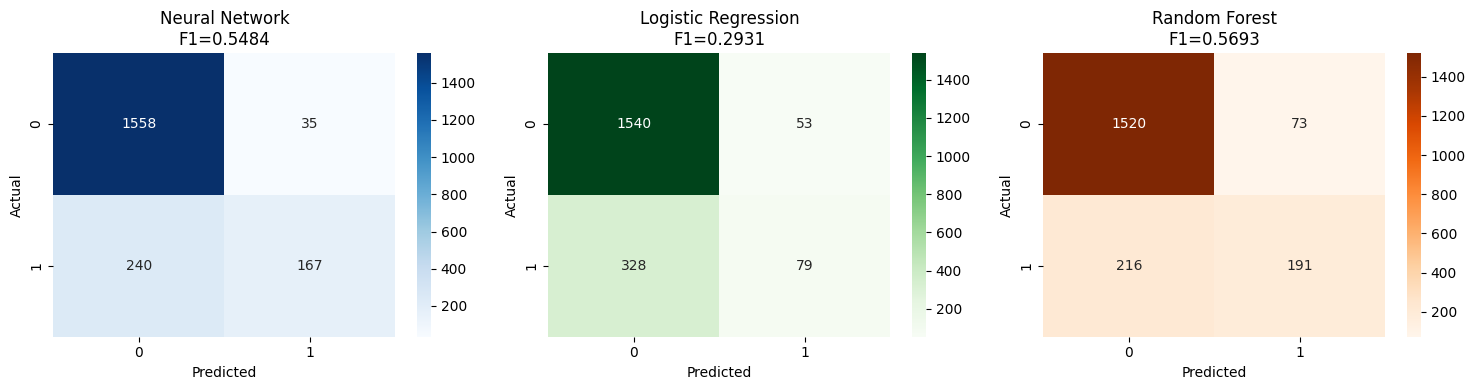

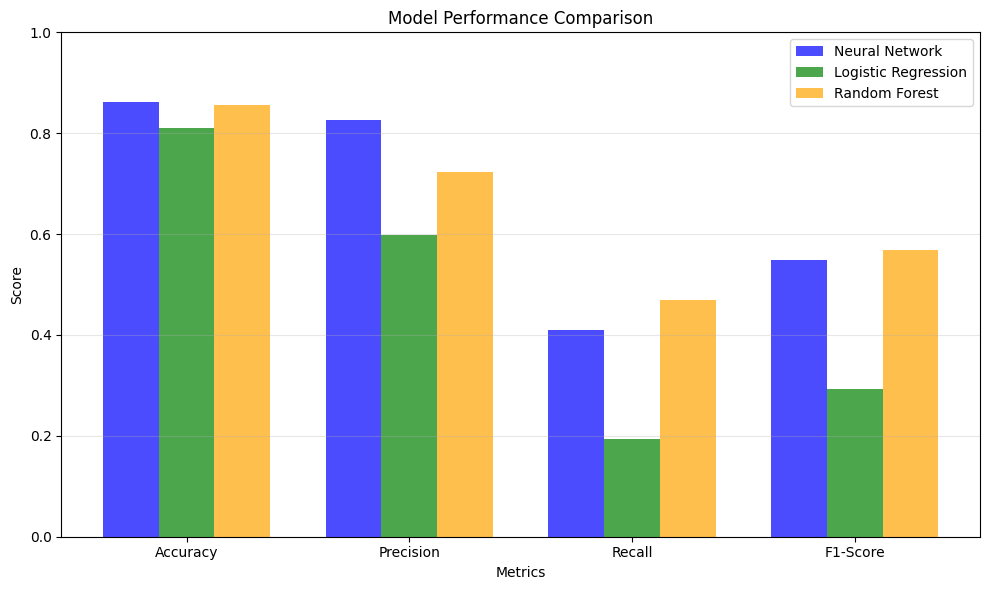

In [17]:
# confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Neural Network
cm1 = confusion_matrix(y_test, nn_pred)
sns.heatmap(cm1, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title(f'Neural Network\nF1={nn_f1:.4f}')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Logistic Regression
cm2 = confusion_matrix(y_test, final_lr_pred)
sns.heatmap(cm2, annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title(f'Logistic Regression\nF1={final_lr_f1:.4f}')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

# Random Forest
cm3 = confusion_matrix(y_test, final_rf_pred)
sns.heatmap(cm3, annot=True, fmt='d', ax=axes[2], cmap='Oranges')
axes[2].set_title(f'Random Forest\nF1={final_rf_f1:.4f}')
axes[2].set_ylabel('Actual')
axes[2].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# performance metrics comparison
fig, ax = plt.subplots(figsize=(10, 6))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
nn_scores = [nn_acc, nn_prec, nn_rec, nn_f1]
lr_scores = [final_lr_acc, final_lr_prec, final_lr_rec, final_lr_f1]
rf_scores = [final_rf_acc, final_rf_prec, final_rf_rec, final_rf_f1]

x = np.arange(len(metrics))
width = 0.25

ax.bar(x - width, nn_scores, width, label='Neural Network', color='blue', alpha=0.7)
ax.bar(x, lr_scores, width, label='Logistic Regression', color='green', alpha=0.7)
ax.bar(x + width, rf_scores, width, label='Random Forest', color='orange', alpha=0.7)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# TASK 8: Conclusion and Reflection

In [18]:
print("-"*60)
print("CONCLUSION AND REFLECTION")
print("-"*60)

print("\n1. MODEL PERFORMANCE")
print("\nNeural Network Results:")
print(f"  Accuracy:  {nn_acc:.4f}")
print(f"  Precision: {nn_prec:.4f}")
print(f"  Recall:    {nn_rec:.4f}")
print(f"  F1-Score:  {nn_f1:.4f}")

print("\nLogistic Regression (Optimized) Results:")
print(f"  Accuracy:  {final_lr_acc:.4f}")
print(f"  Precision: {final_lr_prec:.4f}")
print(f"  Recall:    {final_lr_rec:.4f}")
print(f"  F1-Score:  {final_lr_f1:.4f}")

print("\nRandom Forest (Optimized) Results:")
print(f"  Accuracy:  {final_rf_acc:.4f}")
print(f"  Precision: {final_rf_prec:.4f}")
print(f"  Recall:    {final_rf_rec:.4f}")
print(f"  F1-Score:  {final_rf_f1:.4f}")

# Find best model
all_f1 = [nn_f1, final_lr_f1, final_rf_f1]
best_idx = all_f1.index(max(all_f1))
models = ["Neural Network", "Logistic Regression", "Random Forest"]
best_model = models[best_idx]

print(f"\nBest Model: {best_model}")
print(f"Best F1-Score: {max(all_f1):.4f}")
print("F1-Score is good for imbalanced datasets like this one.")

print("\n" + "-"*60)
print("2. IMPACT OF HYPERPARAMETER TUNING AND FEATURE SELECTION")
print("-"*60)

print("\nCross-Validation:")
print("- Used 5-fold cross validation to find best hyperparameters")
print(f"- Logistic Regression best CV F1: {lr_grid.best_score_:.4f}")
print(f"- Random Forest best CV F1: {rf_grid.best_score_:.4f}")
print("- This helped prevent overfitting")

print("\nFeature Selection:")
print(f"- Reduced features from {X.shape[1]} to {k}")
top_5_features = ", ".join(selected_features[:5])
print(f"- Top features selected: {top_5_features}")
print("- Benefits: simpler model, faster training, less overfitting")
print("- Performance stayed good even with fewer features")

print("\n" + "-"*60)
print("3. INSIGHTS AND FUTURE WORK")
print("-"*60)

print("\nWhat I learned:")
print("- Age is a strong predictor - older customers churn more")
print("- Geography matters - Germany has higher churn rate")
print("- Active members are less likely to leave")
print("- Dataset is imbalanced (80-20 split)")
print("- F1-score is better than accuracy for imbalanced data")

print("\nBusiness insights:")
print("- Banks should focus on older customers (40+ years)")
print("- Pay attention to customers in Germany")
print("- Encourage inactive members to become active")

print("\nFuture improvements:")
print("- Handle class imbalance with SMOTE or class weights")
print("- Try XGBoost or LightGBM models")
print("- Create new features like age groups or balance ratios")
print("- Collect more data like customer satisfaction scores")

print("\nUN SDG Connection:")
print("This project supports Goal 8 (Decent Work and Economic Growth)")
print("by helping banks keep customers and maintain stability.")

print("\n" + "-"*60)
print("END OF CLASSIFICATION TASK")
print("-"*60)

------------------------------------------------------------
CONCLUSION AND REFLECTION
------------------------------------------------------------

1. MODEL PERFORMANCE

Neural Network Results:
  Accuracy:  0.8625
  Precision: 0.8267
  Recall:    0.4103
  F1-Score:  0.5484

Logistic Regression (Optimized) Results:
  Accuracy:  0.8095
  Precision: 0.5985
  Recall:    0.1941
  F1-Score:  0.2931

Random Forest (Optimized) Results:
  Accuracy:  0.8555
  Precision: 0.7235
  Recall:    0.4693
  F1-Score:  0.5693

Best Model: Random Forest
Best F1-Score: 0.5693
F1-Score is good for imbalanced datasets like this one.

------------------------------------------------------------
2. IMPACT OF HYPERPARAMETER TUNING AND FEATURE SELECTION
------------------------------------------------------------

Cross-Validation:
- Used 5-fold cross validation to find best hyperparameters
- Logistic Regression best CV F1: 0.3169
- Random Forest best CV F1: 0.5814
- This helped prevent overfitting

Feature Sele